# Setup (to run once)

In [1]:
%matplotlib notebook
import os

import numpy as np
import pandas as pd
import pydicom
from utils.mri_viewer import MRIViewer, MRIViewerOne

In [2]:
def create_modality_file(dcm_path):
    dicoms = os.listdir(dcm_path)
    dicoms = [dic.strip() for dic in dicoms if dic.strip()[-4:] == '.dcm']
    dicoms = [os.path.join(dcm_path, dic) for dic in dicoms]
    nb_dicoms = len(dicoms)
    
    nb_dicoms_original = 0
    patientIDs = []
    modality = None
    print('\n\x1b[1;30m' + "Description: ", pydicom.read_file(dicoms[0]).SeriesDescription + '\x1b[0m')
    for dic in dicoms:
        sample = pydicom.read_file(dic)
        patientIDs.append(sample.PatientID)
        
        if "ORIGINAL" in sample[("0008", "0008")].value:
            arr = sample.pixel_array
            stack_id = int(sample.InstanceNumber) - 1
            if modality is None:
                shape = [nb_dicoms] + list(arr.shape)
                modality = np.zeros(shape)
            modality[stack_id, :, :] = arr
            nb_dicoms_original += 1
    
    print("\nTotal of {} .dcm in folder.".format(nb_dicoms))
    print("Total of {} original .dcm in folder.".format(nb_dicoms_original))
    if nb_dicoms_original == 0:
        return None, np.unique(patientIDs)
    else:
        return modality[:nb_dicoms_original, ...], np.unique(patientIDs)

def view_dcm_path(dcm_path):
    print("Viewing folder: {}".format(dcm_path))
    a, p = create_modality_file(dcm_path)
    if a is None:
        print("Found no ORIGINAL .dicom files. Can not provide visualization.")
        return

    MRIViewerOne(a, title1=p)
    
def view_unique_description(N):
    dcm_path = pre_or_post_images_fields.loc[pre_or_post_images_fields.description == unique_descriptions[N]].iloc[0].raw_path
    view_dcm_path(dcm_path)

In [3]:
pre_or_post_images_fields = pd.read_csv("descriptions_unclassified_t1_preVpost.csv")
unique_descriptions = sorted(pre_or_post_images_fields.description.unique())

# View MRI by number

Enter DESCRIPTION_NUMBER between 1 and 210 below and hit **`RUN`** on the next two cells.

example: 
 
>```python
DESCRIPTION_NUMBER = 189
```

In [5]:
DESCRIPTION_NUMBER = 11


Viewing folder: /labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2011-09__Studies/778^3343^825_778_MR_2011-09-19_144856_MRI.Brain.w..+.w.o.Contrast_2..AX.SE.T1.FS.W_n24__00000

Description:  2. AX SE T1 FS W

Total of 24 .dcm in folder.
Total of 24 original .dcm in folder.


<IPython.core.display.Javascript object>


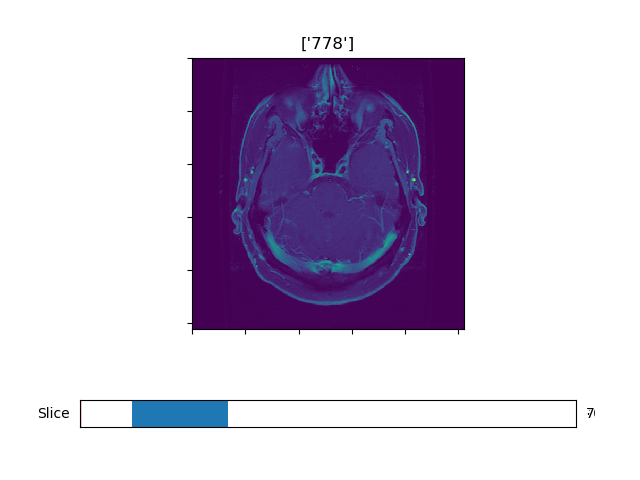

In [7]:
view_unique_description(DESCRIPTION_NUMBER - 1)

# View MRI by folder name

Enter FOLDER_NAME below, between quotation marks, and hit **`RUN`** on the next two cells. These folder names can be found on the last column of the Google Sheet. 

example: 
 
>```python
FOLDER_NAME = "/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-10__Studies/156^2101^825_156_MR_2009-10-23_165252_NEURO^OR.IMRI_TRANS.3D.T1.FLASH.1X1X2_n80__00000"
```

In [ ]:
FOLDER_NAME = "/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2010-08__Studies/427^399^825_427_MR_2010-08-13_153845_MRI.BRAIN.W-WO.CONTRAST_3d.T1.FSPGR.(INCLUDE.NOSE.TIP_n120__00000

Viewing folder: /labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-10__Studies/156^2101^825_156_MR_2009-10-23_165252_NEURO^OR.IMRI_TRANS.3D.T1.FLASH.1X1X2_n80__00000

Description:  TRANS 3D T1 FLASH 1X1X2

Total of 80 .dcm in folder.
Total of 80 original .dcm in folder.


<IPython.core.display.Javascript object>


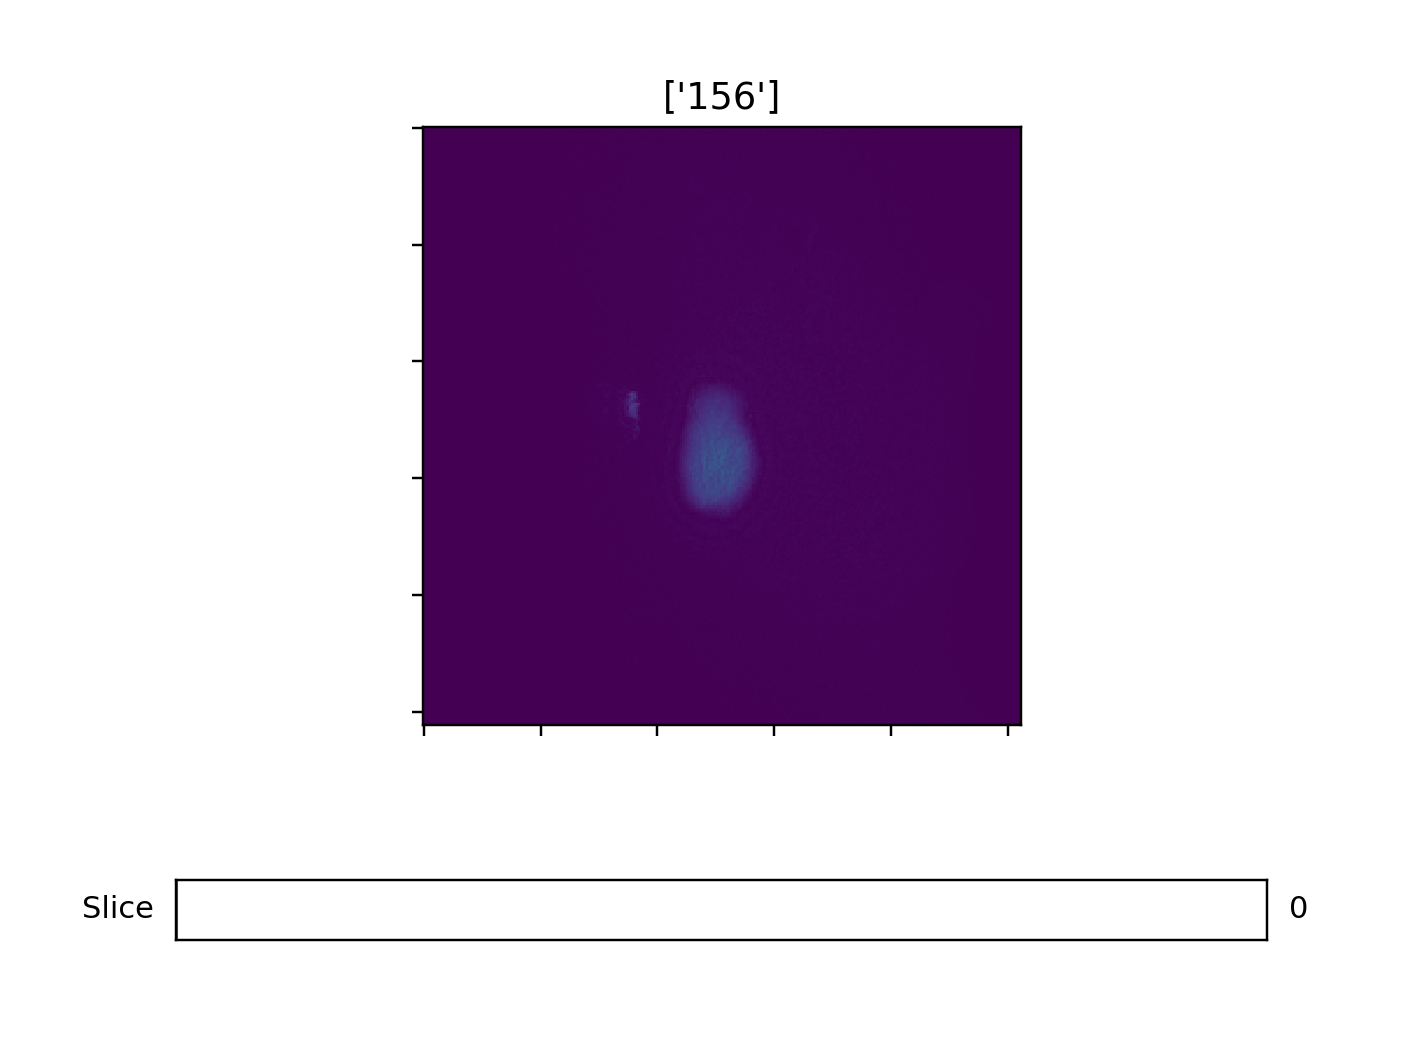

In [94]:
view_dcm_path(FOLDER_NAME)